In [1]:
#input data set is a .csv file with y-profile as first columns, then y-local; last column is label of pt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns
import csv
import tensorflow
from sklearn.preprocessing import StandardScaler

In [2]:
num_rows_train = 100000 # Training Set #Rows
num_rows_valid = 20000
num_row_test = 10000

batch_size = 512
numEpochs = 40

trainSet = '/home/jieun201/makeDataSets_Oct1/train.csv'
validSet = '/home/jieun201/makeDataSets_Oct1/TestSet.csv'
testSet = '/home/jieun201/makeDataSets_Oct1/valid.csv'

In [3]:
def generate_arrays_from_file(path, batchsize):
    inputs = []
    targets = []
    batchcount = 0
    while True:
        with open(path) as f:
            reader = csv.reader(f)
            next(reader, None)
            for line in reader:
                #print('line', line)
                inputs.append(line[0:14])
                targets.append(line[-1])
                batchcount += 1
                if batchcount > batchsize:
                  X = np.asarray(inputs, dtype='float32')
                 # print('X is here', X)  
                  y = np.asarray(targets, dtype='float32')
                  scaler = StandardScaler()                  
                  X_train = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
                  yield (X_train,y)
                  #print('X_train',X_train)
                  #print('y', y)
                               
                  inputs = []
                  targets = []
                  batchcount = 0

In [4]:
model = Sequential()
model.add(Dense(32, input_shape=(14,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

2022-10-01 10:45:36.328803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 10:45:36.363062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 10:45:36.363372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 10:45:36.365101: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,657
Trainable params: 2,657
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
#model.fit(generate_arrays_from_file('test.csv', batch_size),
                    #steps_per_epoch=5, epochs=1,verbose=1)

#model.fit(generate_arrays_from_file('test.csv',3), batch_size=3,steps_per_epoch=5, epochs=1,verbose=1)
#note that batches are ok, but if i put verbose=1, then the dotted line giving the results deletes a row of the batch
#also note that batch size seems to start with a zero, so batch size of 2 --> [1,2,3]

#steps_per_epoch: Integer or None. Total number of steps (batches of samples) before declaring 
#one epoch finished and starting the next epoch. 

In [6]:
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

In [7]:
#num_val_steps = int(15/batch_size)
#to get batch size, do one less than due to zero offset, so if want batch size of 2, do batch size of 1

num_val_steps = num_rows_valid/batch_size
print(num_val_steps)

history = model.fit(generate_arrays_from_file(trainSet,batch_size-1), 
                    steps_per_epoch=num_rows_train/batch_size, epochs=numEpochs,verbose=1,
                    validation_data=generate_arrays_from_file(validSet, batch_size-1), 
                    callbacks=[es],
                    #use_multiprocessing=True,workers=6,
                    validation_steps=num_val_steps)

      #              shuffle=True,
       #             verbose=1)
#so i need to make separate training and validation sets
#it seems this solves the problem of reading from one big file, but still relies on one big file
#which may be ok but if not will have to change to read in sep. files

39.0625
Epoch 1/40
 40/195 [=====>........................] - ETA: 0s - loss: 0.6836 - accuracy: 0.5612

2022-10-01 10:45:38.231482: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


195/195 [==============================] - 2s 6ms/step - loss: 0.6555 - accuracy: 0.6162 - val_loss: 0.6245 - val_accuracy: 0.6665
Epoch 2/40
195/195 [==============================] - 1s 5ms/step - loss: 0.6052 - accuracy: 0.6883 - val_loss: 0.5899 - val_accuracy: 0.7027
Epoch 3/40
195/195 [==============================] - 1s 5ms/step - loss: 0.5782 - accuracy: 0.7172 - val_loss: 0.5707 - val_accuracy: 0.7176
Epoch 4/40
195/195 [==============================] - 1s 5ms/step - loss: 0.5601 - accuracy: 0.7303 - val_loss: 0.5563 - val_accuracy: 0.7281
Epoch 5/40
195/195 [==============================] - 1s 5ms/step - loss: 0.5474 - accuracy: 0.7385 - val_loss: 0.5465 - val_accuracy: 0.7349
Epoch 6/40
195/195 [==============================] - 1s 5ms/step - loss: 0.5391 - accuracy: 0.7419 - val_loss: 0.5430 - val_accuracy: 0.7360
Epoch 7/40
195/195 [==============================] - 1s 5ms/step - loss: 0.5321 - accuracy: 0.7457 - val_loss: 0.5353 - val_accuracy: 0.7404
Epoch 8/40
195/19

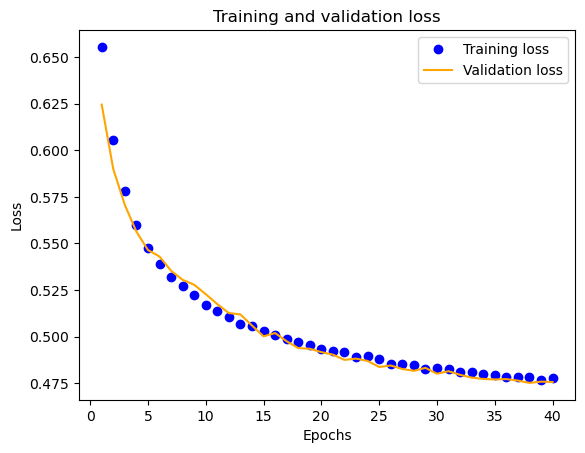

In [8]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')

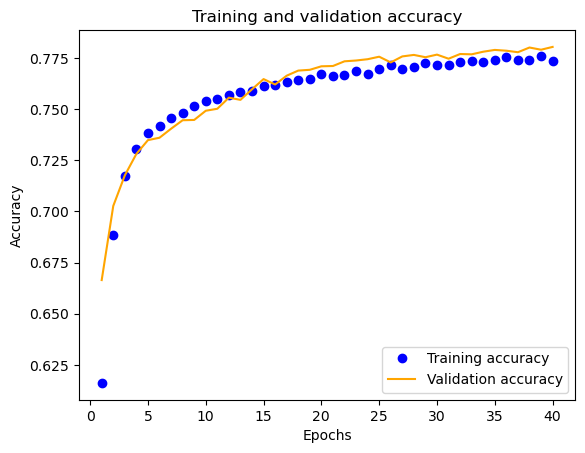

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
np.max(val_acc)
plt.savefig('accuracy.png')
plt.show()

In [10]:
truthB = []
predB = []

test_generator = generate_arrays_from_file(testSet,batch_size-1)
limit = num_row_test/batch_size
 
batches = 0
for i in test_generator:
  #predB.append(model.predict(i[0]))
  predB.append(np.round(model.predict(i[0]),0))
  truthB.append(i[1]) 
  batches += 1
  if batches > (limit)-1:
    break

In [11]:
predBATCHED = np.concatenate(predB)
truthBATCHED = np.concatenate(truthB)

df_predict2 = pd.DataFrame(predBATCHED, columns=['pt'])
df_true = pd.DataFrame(truthBATCHED, columns=['pt'])
df_predict2.to_csv('predictions.csv', header=False)
df_true.to_csv('truePT_label.csv', header=False)
#note also need to save true PT not label for analysis purposes - when making test set, make another file that has PT

In [12]:
df_true

,pt
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9723,0.0
9724,0.0
9725,0.0
9726,0.0


In [13]:
print(confusion_matrix(df_true, df_predict2)) # order matters! (actual, predicted)

[[3835 1076]
 [1100 3717]]


In [14]:
print(classification_report(df_true, df_predict2))

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      4911
         1.0       0.78      0.77      0.77      4817

    accuracy                           0.78      9728
   macro avg       0.78      0.78      0.78      9728
weighted avg       0.78      0.78      0.78      9728

